<a href="https://colab.research.google.com/github/barbarakotlan/CSCI_4170/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 1 - Logistic Regression Implementation
Projects in AI & ML, Spring 2026

Barbara Kotlan

1/26/2026


##Task 1 - Advanced Objective Function and Use Case:

##1.1: Derive the objective function for Logistic Regression using Maximum Likelihood Estimation (MLE). Do some research on the MAP technique for Logistic Regression, include your research on how this technique is different from MLE (include citations).

Probability of the positive class:
$P(y_i=1|x_i, w) = σ(w^Tx_i) = \frac{1}{(1+e^{-w^Tx_i})}$

Probability of the negative class:
$P(y_i=0|x_i, w) = 1 - σ(w^Tx_i)$

Likelyhood of all samples n:
$ℓ(w)=\prod_{i=1}^{n}P(y_i|x_i, w)$

Log-likelihood (easier to optimize):
$ℓ(w)=\log\prod_{i=1}^{n}P(y_i|x_i, w)$
$ℓ(w)=\sum_{i=1}^{n}\log(P(y_i|x_i, w))$

$ℓ(w)=\sum_{i=1}^{n}\log(σ(w^Tx_i)^{y_i}(1-σ(w^Tx_i))^{1-y_i})$

$ℓ(w)=\sum_{i=1}^{n}[\log(σ(w^Tx_i)^{y_i})+ \log(1-σ(w^Tx_i))^{1-y_i})]$

$ℓ(w)=\sum_{i=1}^{n}[{y_i}\log(σ(w^Tx_i))+ (1-y_i)\log(1-σ(w^Tx_i))]$

Objective function:
$\max_{w} ℓ(w)$

$\max_{w}\sum_{i=1}^{n}[{y_i}\log(σ(w^Tx_i))+ (1-y_i)\log(1-σ(w^Tx_i))]$

MAP vs. MLE:
Maximum Likelihood Estimation involves chosing parameters that maximize conditonal likelihood (Lecture 6: Logistic Regression, 2026). The parameters are the weights (w). This is done by maximizing the whole likelihood term for all samples, known as the log-likelihood.

Maximum a Posteriori estimate has a random variable (w) used to specify prior beliefs. It involves maximizing the posterior (Lecture 6: Logistic Regression, 2026). This is then used to find the most likely model parameters given the data. This is done by maximizing the log-likelihood plus the log-prior.

Due to these differences, MLE can overfit with limited data while MAP is able to regularize models (Song, 2025).

##1.2: Define a machine learning problem you wish to solve using Logistic Regression. Justify why logistic regression is the best choice and compare it briefly to another linear classification model (cite your work if this other technique was not covered in class).

Problem: Predict whether patients have a disease based on clinical features. Each patient has a feature vector $x_i$ with a clinical measurement and a binary label $y_i$ that indicates the presence/absence of the disease. The objective is to learn a function that estimates $P(y=1 | x)$.

Why Logistic Regression:
Logistic Regression is designed for binary classificaiton and can directly model conditional probability $P(y=1 | x) = \sigma (w^Tx)$. In healthcare, this risk score is more useful that just a hard classification. There are also learned weights which are able to indicate how much clinical features affect disease risk. These feature importances give insights to better understand the disease.

Comparison:
Linear Support Vector Machine (SVM) is a linear classification model that finds an optional separating hyper plane and maximizes the margin between classes (Linear Support Vector Machine - an Overview | ScienceDirect Topics, n.d.). The margin is a subset of critical training points (support vectors). Logistic regression learns parameters by maximizing the conditional likelihood of labels. It directly estimates class probabilities using the sigmoid function. For disease classification, probability outputs are very useful in understand patient risks and classification accuracy. Logistic regression naturally has these probabilites, making them the better choice.


##1.3: Discuss how your dataset corresponds to the variables in your equations, highlighting any assumptions in your derivation from part 1.

Correspondence:
$x_i$ is the feature vector of the i0-th patient.

$y_i$ is the binary label, 0 for no diease and 1 for yes disease.

$w$ is the weight vector learned during training for the feature vector.

$\hat{p}_i = \sigma (w^Tx_i)$ is the predicted probability that patient $i$ has the disease

For a single point, the likelihood is
$P(y_i|x_i,w) = \hat{p}_i^{y_i}(1-\hat{p}_i)^{1-y_i}$

Assumptions under logistic regression:

1. Linearity: The relationship between the dependent and independent variables is linear.

2. Independence: The observations are independent of each other.

3. Homoscedasticity: The variance of the errors is constant across all levels of the independent variables.

4. Normality: The errors follow a normal distribution.

5. No multicollinearity: The independent variables are not highly correlated with each other.

#Task 2 - Dataset and Advanced EDA:

#2.1: Select a publicly available dataset (excluding commonly used datasets such as Titanic, Housing Prices or Iris). Provide a link to your dataset. Ensure the dataset has at least 10  features to allow for more complex analysis.

Dataset: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

This dataset (Wolberg et al., 1993) looks at 30 features and determines whether a patient has or does not have breast cancer. It has 569 data points. This is a binary classification problem that allows us to use a logistic regression model to predict whether a patient has breast cancer. Target variable is diagnosis - (M = malignant, B = benign).

#2.2: Perform Exploratory Data Analysis (EDA), addressing potential multicollinearity among features. Use Variance Inflation Factor (VIF) to identify highly correlated variables and demonstrate steps to handle them.

Initial Data Inspection:
- No missing values
- A binary target variable
- Continous numerical features

EDA:
Data was loaded into X and y. The shape (596, 30)and summary statistics of the data was observed, providing a good understanding of the dataset. A target distribution graph was creating, displaying 357 benign and 212 malignant diagnosis. A correlation heatmap was created to get an understanding of correlated features.

Variance Inflation Factor was computed on each feature after standardization. Many factors has a high vif, which corresponded to high correlation. For each type feature, there are three total. 1 represents the mean, 2 is the standard error, while 3 displays the largest value. To reduce multicollinearity, only features with 1 at the end were kept. VIF was computed again for the new subset of features. There was still a few features with high correlations (vif >= 10). It reduce this, area and perimeter were removed as they corresponded with radius. Concave points was also removed due to correlation with concavity. VIF was computed for a final time, with all values being under the threshold of 10.


Dataset shape: (569, 30)

Feature summary statistics:
           radius1    texture1  perimeter1        area1  smoothness1  \
count  569.000000  569.000000  569.000000   569.000000   569.000000   
mean    14.127292   19.289649   91.969033   654.889104     0.096360   
std      3.524049    4.301036   24.298981   351.914129     0.014064   
min      6.981000    9.710000   43.790000   143.500000     0.052630   
25%     11.700000   16.170000   75.170000   420.300000     0.086370   
50%     13.370000   18.840000   86.240000   551.100000     0.095870   
75%     15.780000   21.800000  104.100000   782.700000     0.105300   
max     28.110000   39.280000  188.500000  2501.000000     0.163400   

       compactness1  concavity1  concave_points1   symmetry1  \
count    569.000000  569.000000       569.000000  569.000000   
mean       0.104341    0.088799         0.048919    0.181162   
std        0.052813    0.079720         0.038803    0.027414   
min        0.019380    0.000000         0.000000 

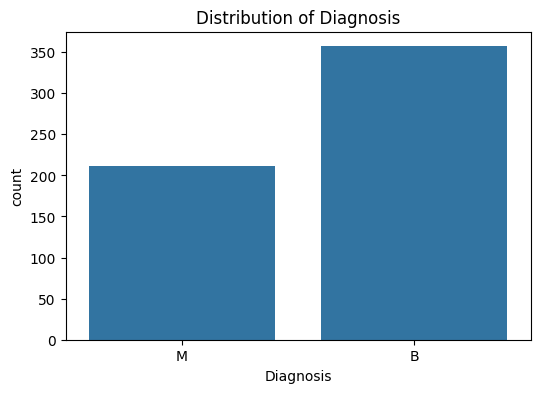

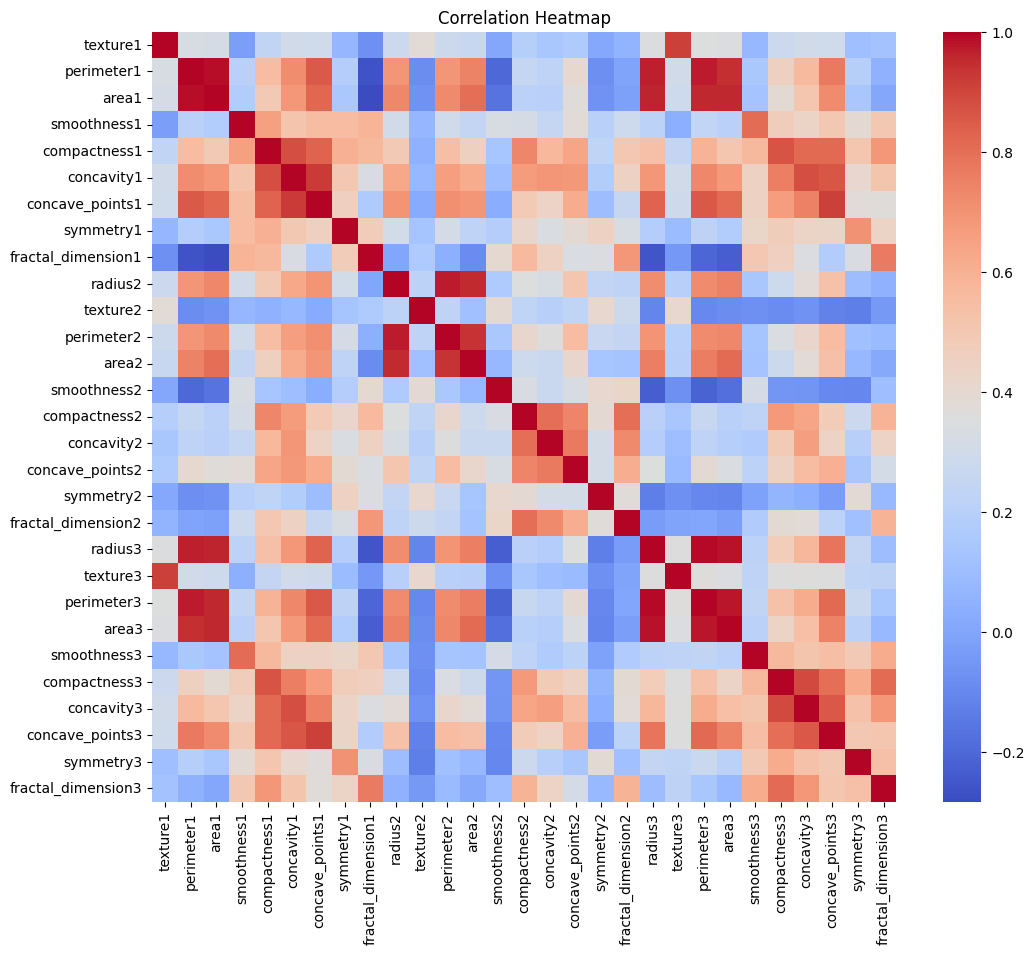

In [1]:
#2.2
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# metadata
meta = breast_cancer_wisconsin_diagnostic.metadata

# variable information
vars = breast_cancer_wisconsin_diagnostic.variables

# shape and summary
print("Dataset shape:", X.shape)
print("\nFeature summary statistics:\n", X.describe())

# target distribution
plt.figure(figsize=(6,4))
sns.countplot(x=y.squeeze())
plt.title("Distribution of Diagnosis")
plt.show()

# correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X[X.columns[1:]].corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()



In [2]:
#vif

# standardize features for VIF calculation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# compute VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X.columns
vif['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
print(vif, "\n")

# removing features to get lower vif
# removing features that do not end in 1 - (each feature has 3 versions: 1 - mean, 2 - standard error, 3 - worst)
keep = [col for col in X.columns if col.endswith('1')]
X_reduced = X[keep]

# standardize features for VIF calculation
X_scaled_reduce = scaler.fit_transform(X_reduced)

# compute VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X_reduced.columns
vif['VIF'] = [variance_inflation_factor(X_scaled_reduce, i) for i in range(X_scaled_reduce.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)
print(vif, "\n")

# removing area and permeter (correlated to radius) and concave points (correlated to concavity)
X_final = X_reduced.drop(columns=['area1', 'perimeter1', 'concave_points1'])

# standardize features for VIF calculation
X_scaled_final = scaler.fit_transform(X_final)

vif = pd.DataFrame()
vif['Feature'] = X_final.columns
vif['VIF'] = [variance_inflation_factor(X_scaled_final, i) for i in range(X_scaled_final.shape[1])]
vif = vif.sort_values(by='VIF', ascending=False).reset_index(drop=True)

print("Final VIF values after removing highly correlated features:")
print(vif, "\n")



               Feature          VIF
0              radius1  3806.115296
1           perimeter1  3786.400419
2              radius3   799.105946
3           perimeter3   405.023336
4                area1   347.878657
5                area3   337.221924
6              radius2    75.462027
7           concavity1    70.767720
8           perimeter2    70.359695
9      concave_points1    60.041733
10        compactness1    50.505168
11               area2    41.163091
12        compactness3    36.982755
13     concave_points3    36.763714
14          concavity3    31.970723
15  fractal_dimension3    18.861533
16            texture3    18.569966
17  fractal_dimension1    15.756977
18          concavity2    15.694833
19        compactness2    15.366324
20            texture1    11.884048
21     concave_points2    11.520796
22         smoothness3    10.923061
23  fractal_dimension2     9.717987
24           symmetry3     9.520570
25         smoothness1     8.194282
26           symmetry2     5


#2.3: Visualize the dataset's feature relationships, ensuring inclusion of at least two advanced visualization techniques (e.g., pair plots with KDE, heatmaps with clustering).

1. Pair Plots with KDE

The pair plot creates a matrix of plots that show every feature against every other feature. The KDE draws Kernal Density Estimates instead of simple scatter plots. This estimates the probability density of data points. It is able to highlight class separation and overlapping distributions.

Graph 2.3.1 has features, including radius1, texture1, and convavity1, which show clear differences in KDE distributions between classes. This means that those features are potentially useful for classification. Fractal_dimension1 appears to overlap with many other features, which indicates that it is less correlated with others.

2. Clustered Heatmap

The clustered heatmap is a heatmap with hierarchical clustering using the correlation matrix of all features. It displays which features are strongly correlated and clusters groups similar features. It easily identifies multicollinearity.

Graph 2.3.2 displays a strong correlation between compactness1 and concavity1 with a value of 0.88, indicating multicollinearity. These two features are also clusted together due to their higher values of correlation for all features. Radius1 and texture1 are clusted and both have generally low correlations with all other features, suggesting they provide unique information. These correlations align well with the pairplot KDE graph.

Graph 2.3.1


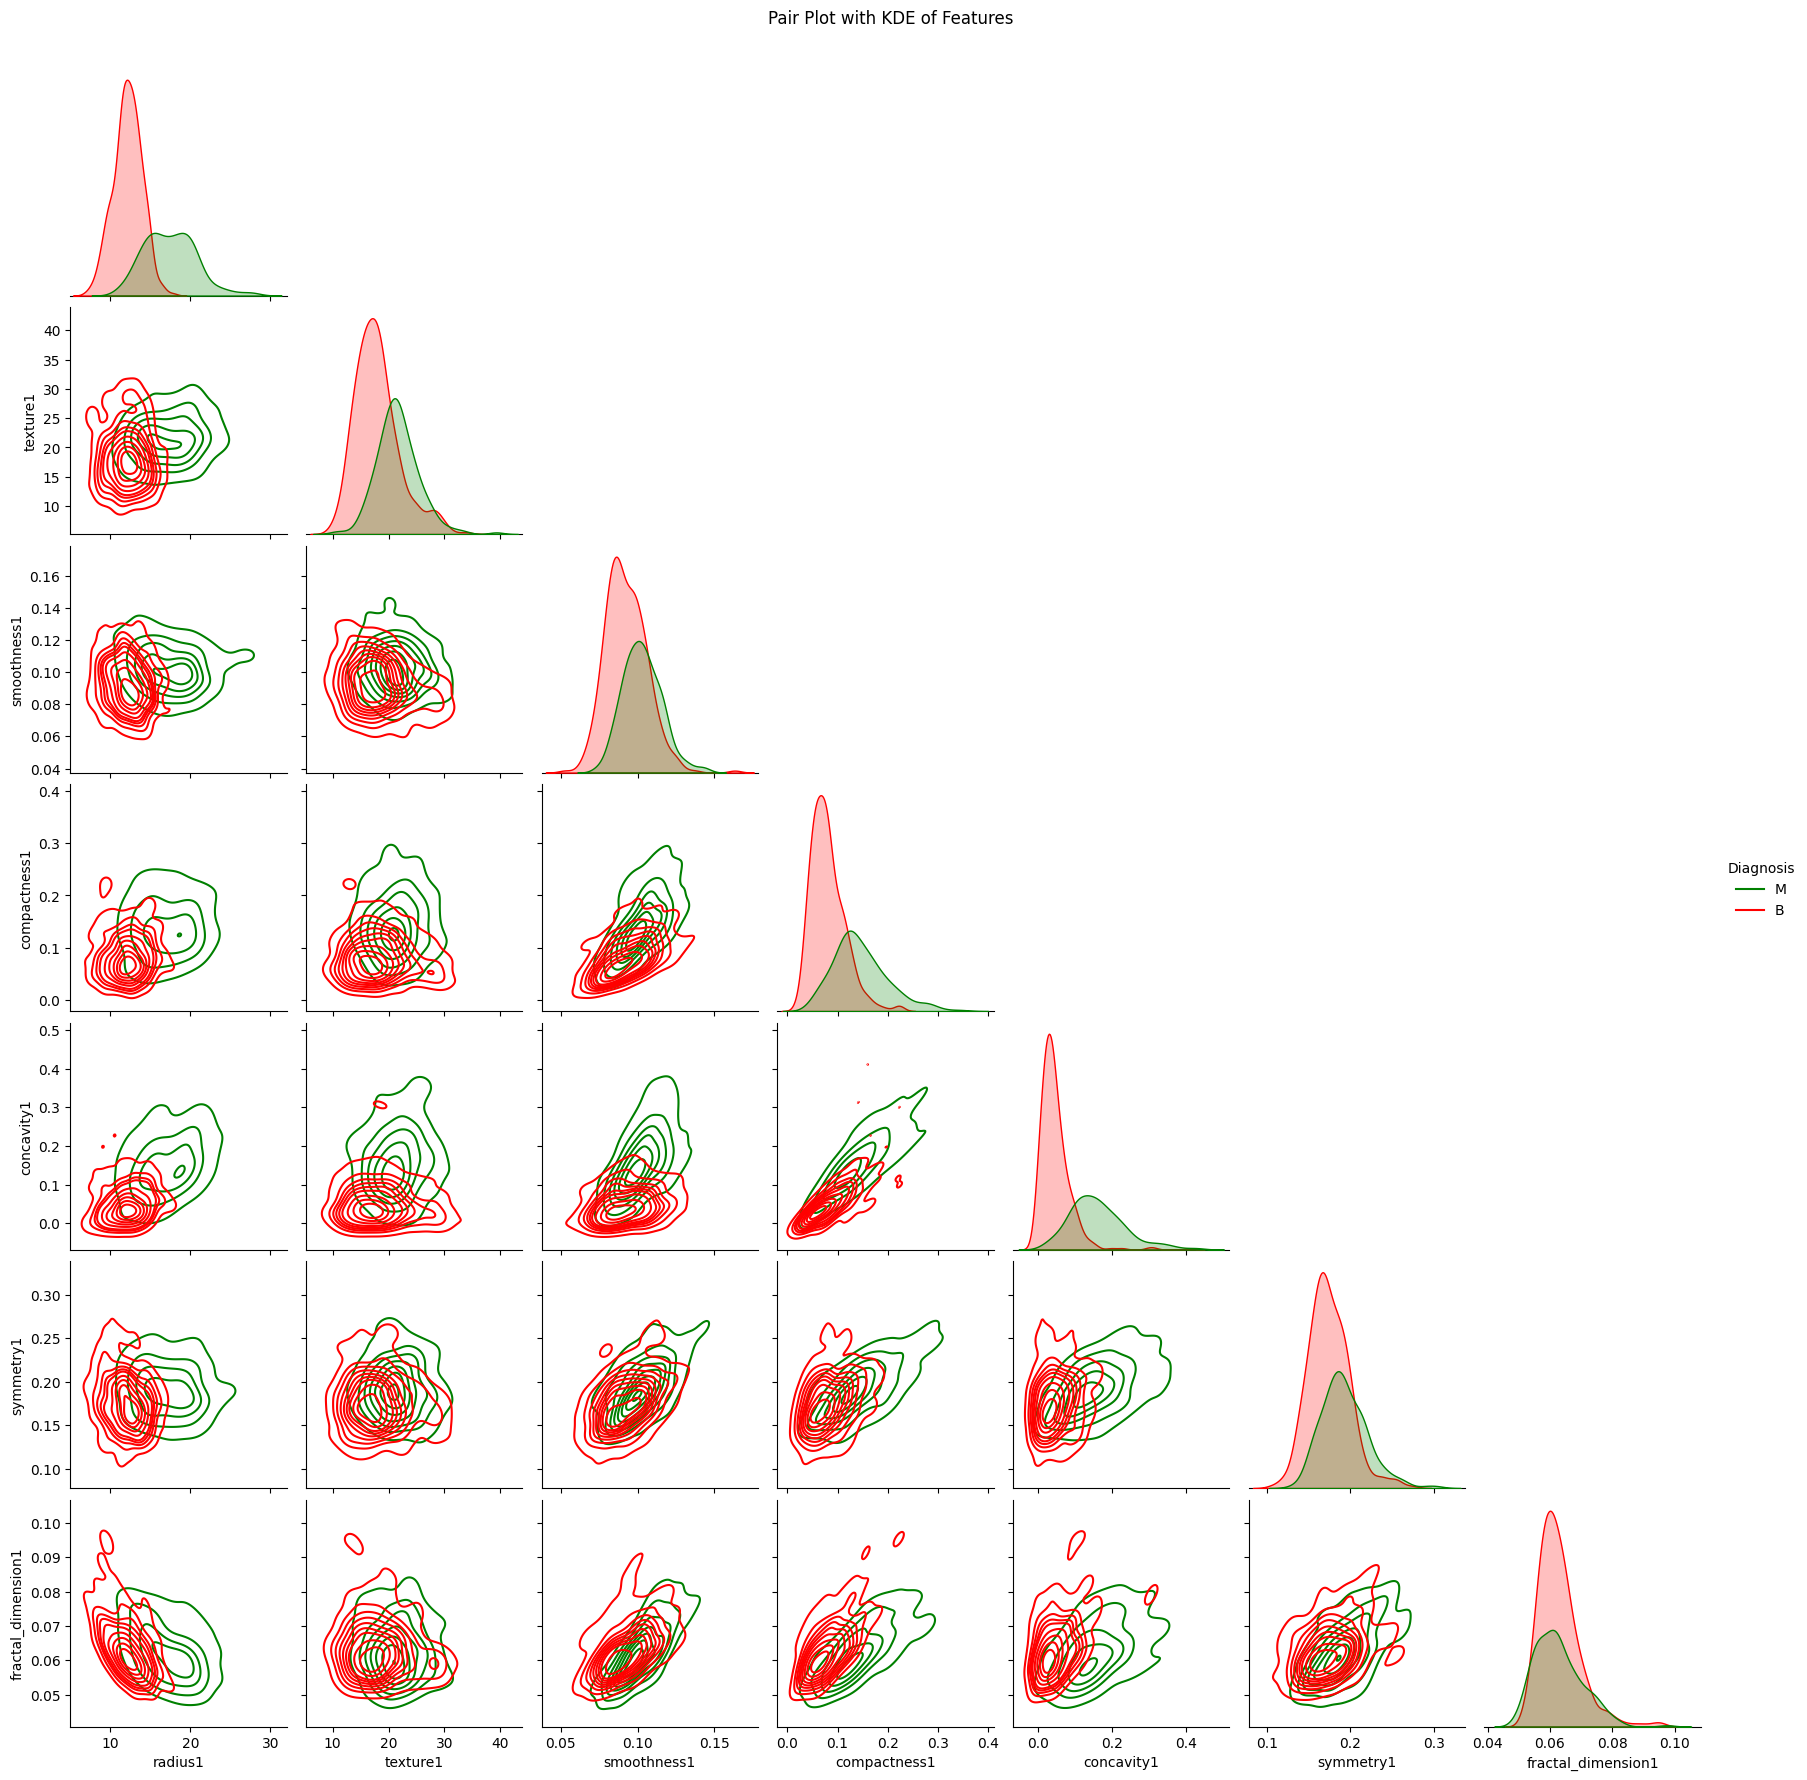

Graph 2.3.2


<Figure size 1200x1000 with 0 Axes>

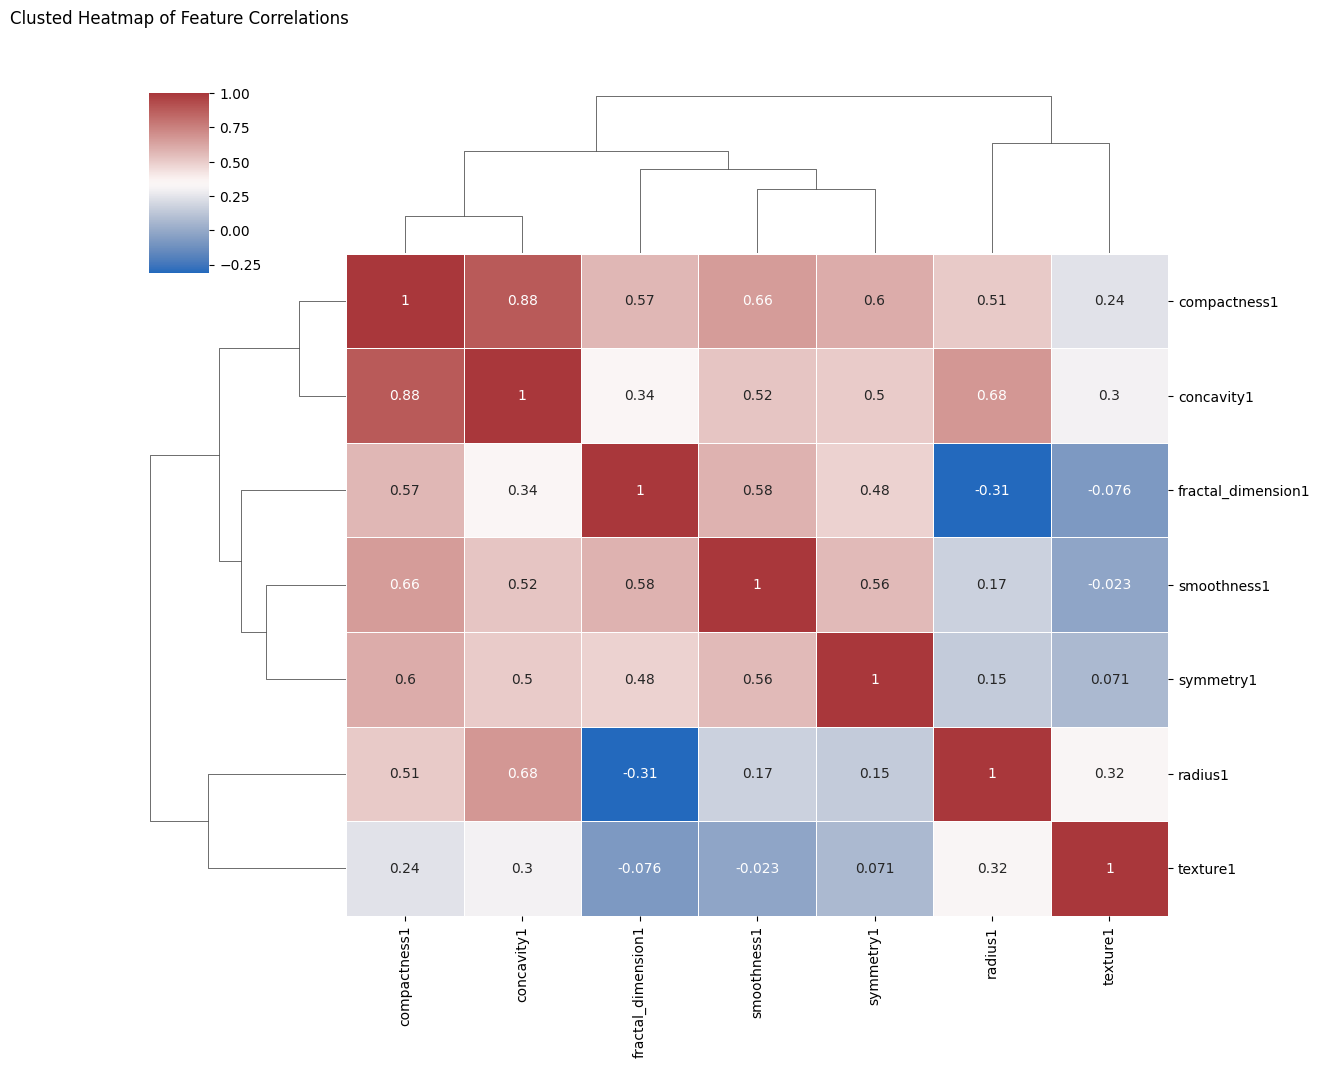

In [3]:
#2.3

#Graph 2.3.1
# pair plot with KDE
print("Graph 2.3.1")
df_pair = X_final.copy()
df_pair['Diagnosis'] = y.squeeze()

sns.pairplot(df_pair, hue='Diagnosis', kind='kde', corner=True, palette=['green', 'red'])
plt.suptitle("Pair Plot with KDE of Features", y=1.02)
plt.show()

#Graph 2.3.2
# clustered heat map
print("Graph 2.3.2")
plt.figure(figsize=(12,10))
sns.clustermap(X_final.corr(), cmap='vlag', linewidth=0.5, annot=True, figsize=(12,10))
plt.title("Clusted Heatmap of Feature Correlations", pad=50)
plt.show()


#Task 3 - Logistic Regression Implementation:

#3.1: Implement Logistic Regression from scratch, including the vectorized implementation of cost function and gradient descent.

In [4]:
#3.1
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data
X = X_final.values
# Convert categorical target to numeric 0/1
y= y.replace({'B': 0, 'M': 1}).astype(np.float64).squeeze()
y = y.values if hasattr(y, 'values') else y


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features for faster optimization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Helper
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize
n, d = X_train.shape
w = np.zeros(d)
b = 0.0
lr = 0.1
steps = 300

for t in range(steps):
    z = X_train @ w + b            # (n,)
    a = sigmoid(z)                  # (n,)
    # binary cross-entropy
    eps = 1e-12
    loss = -(y_train*np.log(a+eps) + (1-y_train)*np.log(1-a+eps)).mean()

    # gradients
    dz = (a - y_train)              # (n,)
    dw = (X_train.T @ dz) / n       # (d,)
    db = dz.mean()

    # update
    w -= lr * dw
    b -= lr * db

    if t % 50 == 0:
        print(f"step {t:3d} | loss {loss:.4f}")

# Evaluate
test_probs = sigmoid(X_test @ w + b)
test_pred = (test_probs >= 0.5).astype(int)
acc = (test_pred == y_test).mean()
print("Test accuracy (from scratch):", round(float(acc), 4))

step   0 | loss 0.6931
step  50 | loss 0.2619
step 100 | loss 0.2102
step 150 | loss 0.1885
step 200 | loss 0.1764
step 250 | loss 0.1685
Test accuracy (from scratch): 0.9386


/tmp/ipython-input-1032065543.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y= y.replace({'B': 0, 'M': 1}).astype(np.float64).squeeze()


#3.2: Implement and compare the three gradient descent variants (e.g., batch gradient descent, stochastic gradient descent, and mini-batch gradient descent). Explain their convergence properties with respect to your cost function.

Batch Gradient Descent:
This uses all training samples to compute the gradient at each step. It has a stable and smooth convergence because the gradient is averaged over the dataset. The loss function also decreases monotonically, creating a smooth curve. Since the gradient is exact, batch gradient descent moves towards the minimu  binary corss-entropy loss. This does mean it like less likely to overhsoot but can get stuck in plateaus with a small learning rate.


Stochastic Gradient Descent:
This updates parameters after each single point. It is fast for each iteration, since it processes one sample at a time. Covergence is oscillatory, since the loss does not decrease smoothly and instead flucuates. Additionally, the binary cross-entropy loss jitters around the global minimun rather than a smooth descent. It is still good for a large dataset since each step is cheap.


Mini-Batch Gradient Descent:
This updates parameters after a small batch of samples. The convergence is smoother than stochastic, but still flucuates slightly. It is faster than regular batch since it does not need the full dataset to update. The binary cross-entropy loss decreases in steps instead of perfectly smooth. The batch size does affect the convergence, with smaller batches being noisier and bigger batches being smoother.


In [5]:
#3.2

# batch gradient descent
def batch_gd(X, y, lr=0.1, steps=300):
  # initalize
  n, d = X.shape
  w = np.zeros(d)
  b = 0.0
  loss_history = []

  for t in range(steps):
    z = X @ w + b            # (n,)
    a = sigmoid(z)                  # (n,)
    # binary cross-entropy
    eps = 1e-12
    loss = -(y*np.log(a+eps) + (1-y)*np.log(1-a+eps)).mean()
    loss_history.append(loss)

    # gradients
    dz = (a - y)              # (n,)
    dw = (X.T @ dz) / n       # (d,)
    db = dz.mean()

    # update
    w -= lr * dw
    b -= lr * db

  return w, b, loss_history

# stochastic gradient descent
def stochastic_gd(X, y, lr=0.1, epochs=10):
    # initalize
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    loss_history = []

    for epoch in range(epochs):
      indices = np.arange(n)
      np.random.shuffle(indices)
      for i in indices:
        xi = X[i].reshape(1, -1)
        yi = y[i]
        z = xi @ w + b            # (n,)
        a = sigmoid(z)                  # (n,)

        # gradients
        dz = (a - yi)              # (n,)
        dw = (xi.T @ dz) / n       # (d,)
        db = dz.mean()

        # update
        w -= lr * dw
        b -= lr * db

      # loss per epoch
      a_all = sigmoid(X @ w + b)
      eps = 1e-12
      loss = -(y*np.log(a+eps) + (1-y)*np.log(1-a+eps)).mean()
      loss_history.append(loss)
    return w, b, loss_history

# mini-batch gradient descent
def mini_batch_gd(X, y, lr=0.1, batch_size=32, epochs=50):
    # initalize
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    loss_history = []

    for epoch in range(epochs):
      indices = np.arange(n)
      np.random.shuffle(indices)
      for start in range(0, n, batch_size):
        end = start + batch_size
        X_batch = X[indices[start:end]]
        y_batch = y[indices[start:end]]
        z = X_batch @ w + b            # (n,)
        a = sigmoid(z)                  # (n,)

        # gradients
        dz = (a - y_batch)              # (n,)
        dw = (X_batch.T @ dz) / X_batch.shape[0]     # (d,)
        db = dz.mean()

        # update
        w -= lr * dw
        b -= lr * db

      # loss per epoch
      a_all = sigmoid(X @ w + b)
      eps = 1e-12
      loss = -(y*np.log(a_all+eps) + (1-y)*np.log(1-a_all+eps)).mean()
      loss_history.append(loss)
    return w, b, loss_history



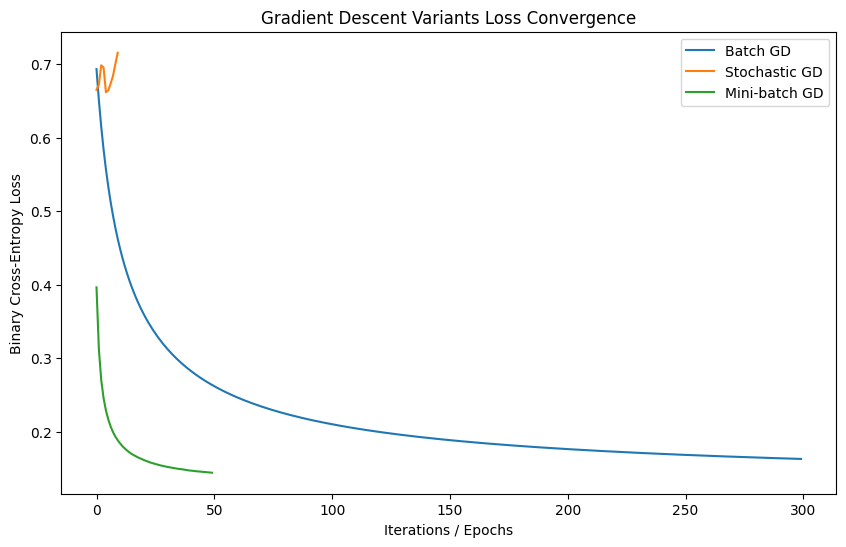

Batch GD accuracy: 0.9385964912280702
Stochastic GD accuracy: 0.7982456140350878
Mini-batch GD accuracy: 0.9385964912280702


In [6]:
#trying gds
# Train all three
w_bgd, b_bgd, loss_bgd = batch_gd(X_train, y_train)
w_sgd, b_sgd, loss_sgd = stochastic_gd(X_train, y_train)
w_mbgd, b_mbgd, loss_mbgd = mini_batch_gd(X_train, y_train)

# Plot convergence
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(loss_bgd, label='Batch GD')
plt.plot(loss_sgd, label='Stochastic GD')
plt.plot(loss_mbgd, label='Mini-batch GD')
plt.xlabel("Iterations / Epochs")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Gradient Descent Variants Loss Convergence")
plt.legend()
plt.show()

# Evaluate test accuracy
def predict(X, w, b):
    return (sigmoid(X @ w + b) >= 0.5).astype(int)

print("Batch GD accuracy:", (predict(X_test, w_bgd, b_bgd) == y_test).mean())
print("Stochastic GD accuracy:", (predict(X_test, w_sgd, b_sgd) == y_test).mean())
print("Mini-batch GD accuracy:", (predict(X_test, w_mbgd, b_mbgd) == y_test).mean())



#Task 4 - Logistic Regression Implementation:

#4.1: Implement or use packages to incorporate any three optimization algorithms (e.g., Momentum, RMSProp, Adam). Compare their performance with the vanilla stochastic gradient descent implementation from Task 3.

Done Below

#4.2: Define and use multiple evaluation metrics (e.g., precision, recall, F1 score) to analyze  and interpret results for each algorithm.

As seen from the results in the code below, each optimization algorithm performs better than the regular stochastic gradient descent. The stochastic has an accuracy of 0.912, precision of 0.90, recall of 0.857, and F1 Score of 0.878. Momentum is slightly better across all measures, with an accuracy of 0.929, precision of 0.905, recall of 0.905, and F1 Score of 0.905. RMSProp is even better across all measures, with an accuracy of 0.939, precision of 0.907, recall of 0.929, and F1 Score of 0.918. Adam is the best of all across most measures other than recall, with an accuracy of 0.947, precision of 0.95, recall of 0.905, and F1 Score of 0.927.

In [7]:
#4.1 & 4.2
import numpy as np
import tensorflow as tf
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import pandas as pd
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input


# data
X_train_tf = X_train.astype(np.float32)
X_test_tf = X_test.astype(np.float32)

y_train_tf = y_train.astype(np.float32)
y_test_tf = y_test.astype(np.float32)

# define optimizers
optimizers = {
    'Vanilla_SGD': SGD(learning_rate=0.01),
    'Momentum': SGD(learning_rate=0.01, momentum=0.9),
    'RMSProp': RMSprop(learning_rate=0.01),
    'Adam': Adam(learning_rate=0.01),
}

history_dict = {}
metrics_results = {}
for name, opt in optimizers.items():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=opt, loss='binary_crossentropy')
    history = model.fit(X_train_tf, y_train_tf, epochs=50, batch_size=32, verbose=0)
    history_dict[name] = history

    # evalutation metrics - 4.2
    y_prob = model.predict(X_test_tf, verbose=0)
    y_pred = (y_prob >= 0.5).astype(int).ravel()

    metrics_results[name] = {"Accuracy": accuracy_score(y_test_tf, y_pred), "Precision": precision_score(y_test_tf, y_pred), "Recall": recall_score(y_test_tf, y_pred), "F1 Score": f1_score(y_test_tf, y_pred)}

    print("{} metrics: {}".format(name, metrics_results[name]))





Vanilla_SGD metrics: {'Accuracy': 0.9210526315789473, 'Precision': 0.8837209302325582, 'Recall': 0.9047619047619048, 'F1 Score': 0.8941176470588236}
Momentum metrics: {'Accuracy': 0.956140350877193, 'Precision': 0.9512195121951219, 'Recall': 0.9285714285714286, 'F1 Score': 0.9397590361445783}


RMSProp metrics: {'Accuracy': 0.9210526315789473, 'Precision': 0.8837209302325582, 'Recall': 0.9047619047619048, 'F1 Score': 0.8941176470588236}
Adam metrics: {'Accuracy': 0.9298245614035088, 'Precision': 0.9047619047619048, 'Recall': 0.9047619047619048, 'F1 Score': 0.9047619047619048}



#4.3: Perform a hyperparameter tuning process (manual or automated using grid search/random search) for each optimization algorithm and assess its impact on performance. If you have to do some research for these techniques, please cite your sources.

Two main hyperparameter are tuned below, learning rate and momentum. Learning rate is the step size in gradient updates (Data, 2025), while momentum helps accelerate convergence and smooths out oscillations (Lee, Gasswint, & Henning, 2021). For each optimizer, the network was trained with different hyperparameter values and evaluated with accuracy, precision, recall, and F1 score.

The process is similar to manual grid search, where combinations of hyperparameters are explored to find one with the best performance. This is a searhc technique widly used in deep learning for hyperparameter optimization (Bergstra & Bengio, 2012).


In [8]:
#4.3
# tuning learning rate and momentum

# define grids
learning_rates = [0.001, 0.01, 0.1]
momentum_values = [0.8, 0.9, 0.99]

# SGD
sdg_results = []

for lr in learning_rates:

    # building simple model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))

    # compile with SGD optimizer and learning rate
    model.compile(optimizer=SGD(learning_rate=lr), loss='binary_crossentropy')

    # training the model
    model.fit(X_train_tf, y_train_tf, epochs=50, batch_size=32, verbose=0)

    # evalutation metrics
    y_prob = model.predict(X_test_tf, verbose=0)
    y_pred = (y_prob >= 0.5).astype(int).ravel()

    metrics_results = {"Accuracy": accuracy_score(y_test_tf, y_pred), "Precision": precision_score(y_test_tf, y_pred), "Recall": recall_score(y_test_tf, y_pred), "F1 Score": f1_score(y_test_tf, y_pred)}
    metrics_results["lr"] = lr
    sdg_results.append(metrics_results)

sgd_df = pd.DataFrame(sdg_results)
print("Vanilla SGD tuning results: ")
print(sgd_df)

# momentum SGD
momentum_results = []

for lr in learning_rates:
  for m in momentum_values:

      # building simple model
      model = Sequential()
      model.add(Input(shape=(X_train.shape[1],)))
      model.add(Dense(1, activation='sigmoid'))

      # compile with SGD and momentum
      model.compile(optimizer=SGD(learning_rate=lr, momentum=m), loss='binary_crossentropy')

      # train model
      model.fit(X_train_tf, y_train_tf, epochs=50, batch_size=32, verbose=0)

      # evalutation metrics
      y_prob = model.predict(X_test_tf, verbose=0)
      y_pred = (y_prob >= 0.5).astype(int).ravel()

      metrics_results = {"Accuracy": accuracy_score(y_test_tf, y_pred), "Precision": precision_score(y_test_tf, y_pred), "Recall": recall_score(y_test_tf, y_pred), "F1 Score": f1_score(y_test_tf, y_pred)}
      metrics_results["lr"] = lr
      metrics_results["momentum"] = m
      momentum_results.append(metrics_results)

momentum_df = pd.DataFrame(momentum_results)
print("Momentum tuning results: ")
print(momentum_df)

# RMSProp
rsmprop_results = []

for lr in learning_rates:

    #build model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))

    # compile with RMSProp optimizer
    model.compile(optimizer=RMSprop(learning_rate=lr), loss='binary_crossentropy')

    # train model
    model.fit(X_train_tf, y_train_tf, epochs=50, batch_size=32, verbose=0)

    # evalutation metrics
    y_prob = model.predict(X_test_tf, verbose=0)
    y_pred = (y_prob >= 0.5).astype(int).ravel()

    metrics_results = {"Accuracy": accuracy_score(y_test_tf, y_pred), "Precision": precision_score(y_test_tf, y_pred), "Recall": recall_score(y_test_tf, y_pred), "F1 Score": f1_score(y_test_tf, y_pred)}
    metrics_results["lr"] = lr
    rsmprop_results.append(metrics_results)

rsmprop_df = pd.DataFrame(sdg_results)
print("RSMProp tuning results: ")
print(rsmprop_df)

# Adam
adam_results = []

for lr in learning_rates:

    # build model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(1, activation='sigmoid'))

    # compile with Adam optimizer
    model.compile(optimizer=Adam(learning_rate=lr), loss='binary_crossentropy')

    # train model
    model.fit(X_train_tf, y_train_tf, epochs=50, batch_size=32, verbose=0)

    # evalutation metrics
    y_prob = model.predict(X_test_tf, verbose=0)
    y_pred = (y_prob >= 0.5).astype(int).ravel()

    metrics_results = {"Accuracy": accuracy_score(y_test_tf, y_pred), "Precision": precision_score(y_test_tf, y_pred), "Recall": recall_score(y_test_tf, y_pred), "F1 Score": f1_score(y_test_tf, y_pred)}
    metrics_results["lr"] = lr
    adam_results.append(metrics_results)

adam_df = pd.DataFrame(adam_results)
print("Adam tuning results: ")
print(adam_df)

Vanilla SGD tuning results: 
   Accuracy  Precision    Recall  F1 Score     lr
0  0.649123   0.523810  0.523810  0.523810  0.001
1  0.912281   0.921053  0.833333  0.875000  0.010
2  0.938596   0.926829  0.904762  0.915663  0.100
Momentum tuning results: 
   Accuracy  Precision    Recall  F1 Score     lr  momentum
0  0.859649   0.795455  0.833333  0.813953  0.001      0.80
1  0.929825   0.947368  0.857143  0.900000  0.001      0.90
2  0.938596   0.926829  0.904762  0.915663  0.001      0.99
3  0.947368   0.950000  0.904762  0.926829  0.010      0.80
4  0.929825   0.925000  0.880952  0.902439  0.010      0.90
5  0.938596   0.906977  0.928571  0.917647  0.010      0.99
6  0.921053   0.883721  0.904762  0.894118  0.100      0.80
7  0.929825   0.886364  0.928571  0.906977  0.100      0.90
8  0.912281   0.863636  0.904762  0.883721  0.100      0.99
RSMProp tuning results: 
   Accuracy  Precision    Recall  F1 Score     lr
0  0.649123   0.523810  0.523810  0.523810  0.001
1  0.912281   0.9210

#4.4: Conclude by discussing the practical trade-offs of the algorithms, including computational complexity, interpretability, and suitability for large-scale datasets.

Stochastic Gradient Descent is simple, lightweight, and easy to implement. However, it can be slow and sensitive to learning rate. Its computational complexity is low per iteration since it is only able ot process one sample at a time (Zhu, 2025). It has great interpretability, with little to no complexity. It is more suitable for smaller datasets, however it can coverge slowly with noisy updates for larger datasets.

Stochastic Gradient Descent with Momentum improves covergence speed and stability for oscillatory datasets compared to regular SGD (Zhu, 2025). It is slightly more compuationally complex than regular SGD due to the momentum term, but still relatively lightweight. Its interpretability is more complex than SGD due to past gradients, but still is understandable. It is more suitable for large-scale datasets and it is able to accelerate covergence and reduce flucuations in the cost function (Andriana, 2025).

RMSProp adapts learning rate dynamically, whihc improves training on complex data. It has a higher computational complexity than SGD with and without momentum due to the runnign avergae of squared gradients. It is moderatly interpretable, the main setback being adaptive learning rates per parameter that are less inutitive. It is suitable for large-sclae datasets since it handles varying gradient magnitiudes well (Andriana, 2025).

Adam is able to combine the benefits of momentum and RMSProp, with a faster convergence and robustness. It has a higher computational complexity that all previous methods since it must maintain both momentum and adaptive learning rates. It is more complex with a reduced interpretability (Andriana, 2025). It is suitable for large datasets and deep networks. It converges fasters and requires less manual learnign rate tuning for these.

An optimizer choice should balence computaiontal complexity, dataset size, and convergence requirements. Small and interpretable models will do well is regualr SGD or momentum, while deep learning perfers RMSProp or Adam (Andriana, 2025).

# Citations
Andriana. (2025, August 28). SGD with Momentum vs RMSprop vs Adam: Mastering deep learning optimization algorithms with these 3 approaches. FeedForward. https://feedforward.sh/sgd-rmsprop-adam/

Bergstra, J., & Bengio, Y. (2012). Random search for hyper-parameter optimization. Journal of Machine Learning Research, 13, 281–305.

Data, A. (2025, February 18). How to Choose the Right Learning Rate in Deep Learning (with PyTorch). Medium. https://medium.com/@sahin.samia/how-to-choose-the-right-learning-rate-in-deep-learning-with-pytorch-690de782b405

Lecture 6: Logistic Regression. (2026). Cornell.edu. https://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote06.html

Lee, T., Gasswint, G., & Henning, E. (2021). Momentum. Cornell University Computational Optimization Open Textbook – Optimization Wiki. https://optimization.cbe.cornell.edu/index.php?title=Momentum

‌Song, P. (2025, December 29). MLE vs. MAP: Maximum Likelihood and Maximum A Posteriori Estimation - ML Journey. ML Journey. https://mljourney.com/mle-vs-map-maximum-likelihood-and-maximum-a-posteriori-estimation/

‌Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). Breast Cancer Wisconsin (Diagnostic) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

Zhu, K. (2025, October 26). Comparison of optimization algorithms in deep learning: SGD, Adam, and more. AIML.com. https://aiml.com/comparing-optimization-algorithms-in-deep-learning-sgd-adam-and-more/